<a href="https://colab.research.google.com/github/hhbenraheem/dads-lab/blob/main/ml2_6520422005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Import Libraries**

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Technical Indicators
import plotly.express as px
import plotly.graph_objects as go

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

## **Step 2: Import Data**

In [ ]:
aapl = yf.Ticker('AAPL')
interval = '1h'
start = '2022-02-20'
end = '2024-02-10'
df = aapl.history(interval=interval,start=start,end=end)
df = df.dropna()
df = df.reset_index()
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-02-22 09:30:00-05:00,164.979996,166.690002,163.850006,166.630005,23044321,0.0,0.0
1,2022-02-22 10:30:00-05:00,166.630005,166.679993,164.410004,164.550003,10346244,0.0,0.0
2,2022-02-22 11:30:00-05:00,164.550003,165.320007,164.330002,164.404999,7787640,0.0,0.0
3,2022-02-22 12:30:00-05:00,164.399994,164.589996,163.561996,163.899994,6970095,0.0,0.0
4,2022-02-22 13:30:00-05:00,163.889999,164.059998,162.149994,163.350006,10939192,0.0,0.0
...,...,...,...,...,...,...,...,...
3448,2024-02-09 11:30:00-05:00,189.588394,189.990005,189.100098,189.339996,5933174,0.0,0.0
3449,2024-02-09 12:30:00-05:00,189.335007,189.679993,189.149994,189.470093,3946336,0.0,0.0
3450,2024-02-09 13:30:00-05:00,189.479996,189.529999,188.699997,188.850006,3957939,0.0,0.0
3451,2024-02-09 14:30:00-05:00,188.840698,189.029999,188.565002,188.809998,3908875,0.0,0.0


In [ ]:
msft = yf.Ticker('MSFT')
interval = '1h'
start = '2022-02-20'
end = '2024-02-10'
df2 = msft.history(interval=interval,start=start,end=end)
df2 = df.dropna()
df2 = df.reset_index()
df2

,index,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2022-02-22 09:30:00-05:00,164.979996,166.690002,163.850006,166.630005,23044321,0.0,0.0
1,1,2022-02-22 10:30:00-05:00,166.630005,166.679993,164.410004,164.550003,10346244,0.0,0.0
2,2,2022-02-22 11:30:00-05:00,164.550003,165.320007,164.330002,164.404999,7787640,0.0,0.0
3,3,2022-02-22 12:30:00-05:00,164.399994,164.589996,163.561996,163.899994,6970095,0.0,0.0
4,4,2022-02-22 13:30:00-05:00,163.889999,164.059998,162.149994,163.350006,10939192,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3448,3448,2024-02-09 11:30:00-05:00,189.588394,189.990005,189.100098,189.339996,5933174,0.0,0.0
3449,3449,2024-02-09 12:30:00-05:00,189.335007,189.679993,189.149994,189.470093,3946336,0.0,0.0
3450,3450,2024-02-09 13:30:00-05:00,189.479996,189.529999,188.699997,188.850006,3957939,0.0,0.0
3451,3451,2024-02-09 14:30:00-05:00,188.840698,189.029999,188.565002,188.809998,3908875,0.0,0.0


In [ ]:
fig = px.line(df, x="Datetime", y="Close", title='Apple')
fig.show()

In [ ]:
fig = px.line(df2, x="Datetime", y="Close", title='Microsoft')
fig.show()

## **Step 3: Define Predictor/Independent Variables**

In [ ]:
#เอาราคาเปิด-ปิด Microsoft มาใส่
df['MSFT_Open'] = df2['Open']
df['MSFT_Close'] = df2['Close']
df.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,MSFT_Open,MSFT_Close
0,2022-02-22 09:30:00-05:00,164.979996,166.690002,163.850006,166.630005,23044321,0.0,0.0,164.979996,166.630005
1,2022-02-22 10:30:00-05:00,166.630005,166.679993,164.410004,164.550003,10346244,0.0,0.0,166.630005,164.550003
2,2022-02-22 11:30:00-05:00,164.550003,165.320007,164.330002,164.404999,7787640,0.0,0.0,164.550003,164.404999
3,2022-02-22 12:30:00-05:00,164.399994,164.589996,163.561996,163.899994,6970095,0.0,0.0,164.399994,163.899994
4,2022-02-22 13:30:00-05:00,163.889999,164.059998,162.149994,163.350006,10939192,0.0,0.0,163.889999,163.350006


In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
# df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.drop(['Datetime','Dividends','Stock Splits','Volume'],axis=1)
X

<ipython-input-76-4374f9db996f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-4374f9db996f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-4374f9db996f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-4374f9d

,Open,High,Low,Close,MSFT_Open,MSFT_Close,S_10,Corr,Open-Close,Open-Open
36,166.157700,166.429993,164.660004,164.850006,166.157700,164.850006,164.486961,0.071458,0.007996,1.462692
37,164.840897,164.880005,163.021301,163.929993,164.840897,163.929993,164.392961,0.275260,-0.009109,-1.316803
38,163.910004,164.399994,162.520004,162.547699,163.910004,162.547699,164.269731,0.226300,-0.019989,-0.930893
39,162.550003,163.339996,162.509995,163.191406,162.550003,163.191406,164.080872,0.600667,0.002304,-1.360001
40,163.199997,163.889999,162.570007,162.869995,163.199997,162.869995,163.937871,0.650184,0.008591,0.649994
...,...,...,...,...,...,...,...,...,...,...
3448,189.588394,189.990005,189.100098,189.339996,189.588394,189.339996,188.484720,-0.560517,0.002594,1.098389
3449,189.335007,189.679993,189.149994,189.470093,189.335007,189.470093,188.652089,-0.385986,-0.004990,-0.253387
3450,189.479996,189.529999,188.699997,188.850006,189.479996,188.850006,188.736589,-0.176213,0.009903,0.144989
3451,188.840698,189.029999,188.565002,188.809998,188.840698,188.809998,188.747589,-0.197885,-0.009308,-0.639297


## **Step 4: Define Target/Dependent Variable**

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y

array([-1, -1,  1, ..., -1,  1, -1])

## **Step 5: Split The Dataset**

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

## **Step 6: Instantiate The Logistic Regression in Python**

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

## **Step 7: Examine The Coefficients**

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.12062625027261713]
1,High,[0.0996005052427513]
2,Low,[0.17936854082828182]
3,Close,[-0.0018530160404409094]
4,MSFT_Open,[-0.12062625027400065]
5,MSFT_Close,[-0.0018530160404409094]
6,S_10,[-0.03409517756084316]
7,Corr,[0.06365460007317789]
8,Open-Close,[0.07437106082645999]
9,Open-Open,[-0.06370720036914408]


## **Step 8: Calculate Class Probabilities**

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.47313678 0.52686322]
 [0.48349019 0.51650981]
 [0.45079888 0.54920112]
 ...
 [0.51956528 0.48043472]
 [0.48779077 0.51220923]
 [0.49638761 0.50361239]]


## **Step 9: Predict Class Labels**

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.47313678 0.52686322]
 [0.48349019 0.51650981]
 [0.45079888 0.54920112]
 ...
 [0.51956528 0.48043472]
 [0.48779077 0.51220923]
 [0.49638761 0.50361239]]


## **Step 10: Evaluate The Model**

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[178 309]
 [154 385]]


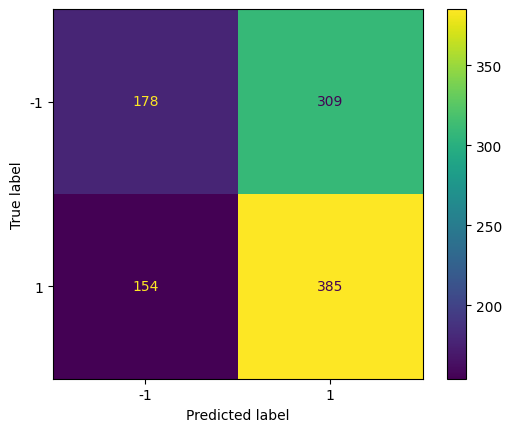

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

ConfusionMatrixDisplay.from_predictions(y_test, predicted)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.54      0.37      0.43       487
           1       0.55      0.71      0.62       539

    accuracy                           0.55      1026
   macro avg       0.55      0.54      0.53      1026
weighted avg       0.55      0.55      0.53      1026



In [ ]:
print(model.score(X_test,y_test))
0.528

0.5487329434697856


0.528

In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[0.54678363 0.52339181 0.49707602 0.52923977 0.54385965 0.53216374
 0.51461988 0.51906158 0.5542522  0.54252199]
0.5302970280050078


## **Step 11: Create Trading Strategy Using The Model**

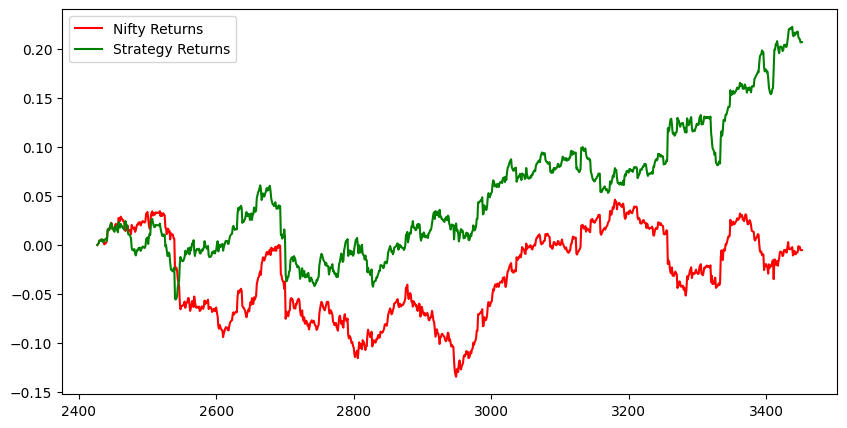

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()